In [3]:
# import the necessary packages
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to input image")
# args = vars(ap.parse_args())

In [15]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


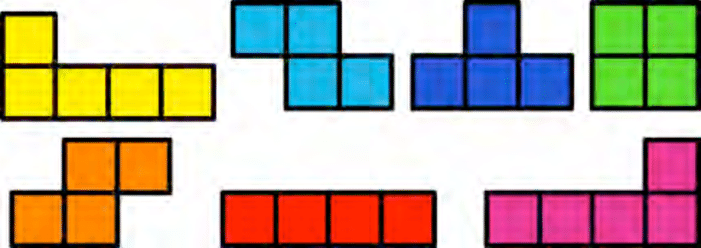

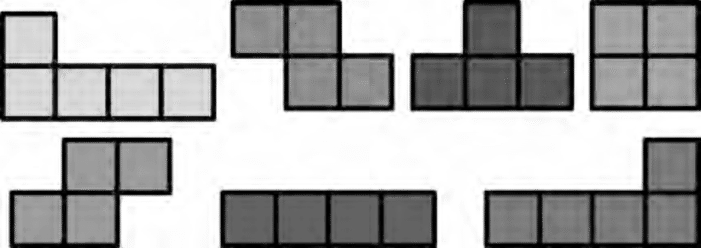

-1

In [28]:
# load the input image (whose path was supplied via command line
# argument) and display the image to our screen
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/PyImageSearch/shapes3.png")
cv2_imshow(image)
cv2.waitKey(0)
# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
cv2.waitKey(0)

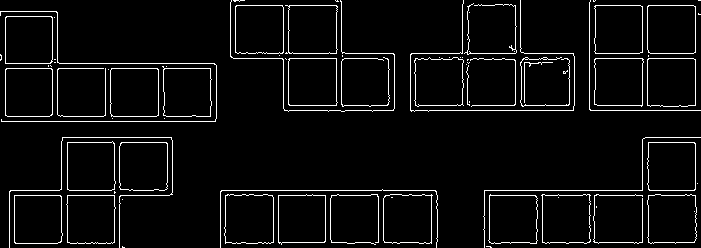

-1

In [29]:
edged = cv2.Canny(gray, 30, 150)
cv2_imshow(edged)
cv2.waitKey(0)

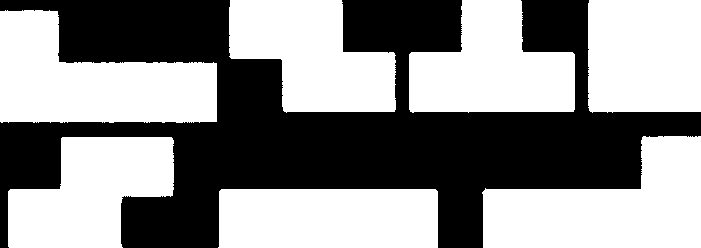

-1

In [30]:
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
cv2_imshow(thresh)
cv2.waitKey(0)

In [31]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnts = imutils.grab_contours(cnts)
output = image.copy()

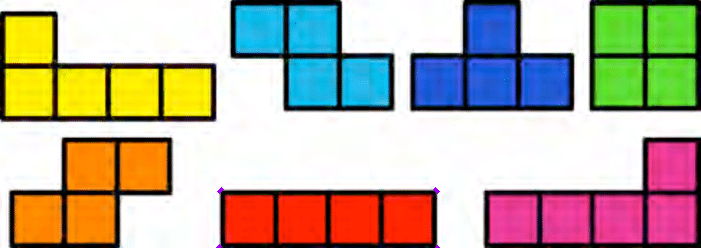

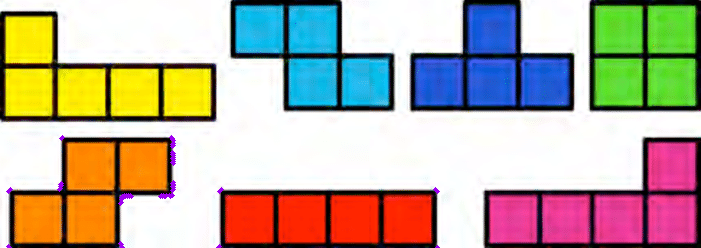

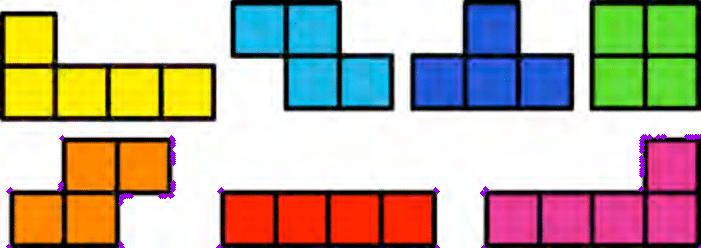

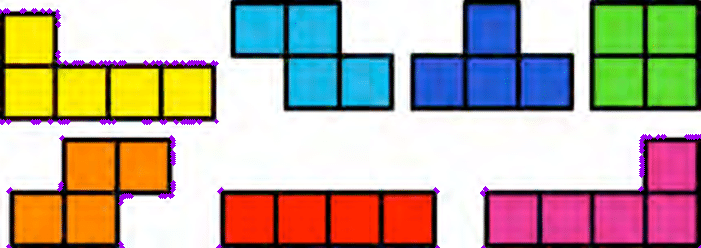

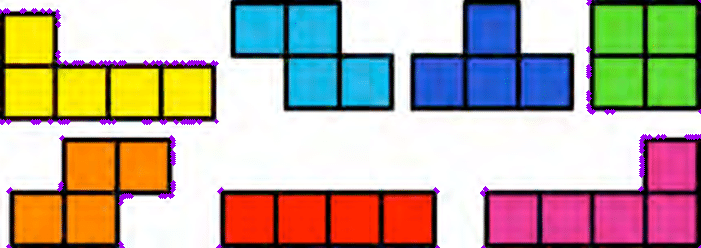

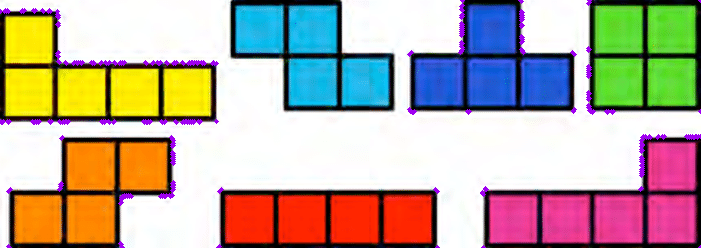

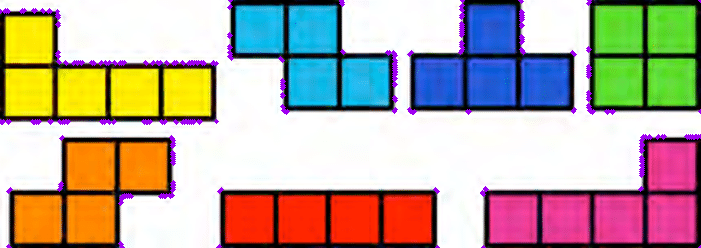

In [32]:
for c in cnts:
  cv2.drawContours(output, c, -1, (240, 0, 159), 3)
  cv2_imshow(output)
  cv2.waitKey(0)

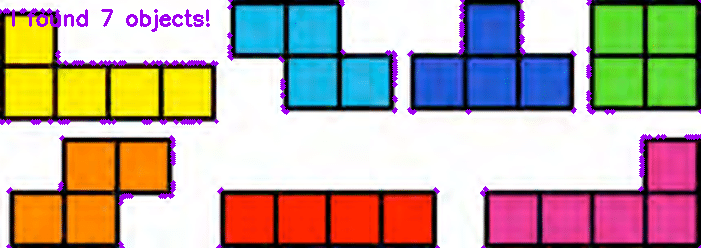

-1

In [34]:
# draw the total number of contours found in purple
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(240, 0, 159), 2)
cv2_imshow(output)
cv2.waitKey(0)

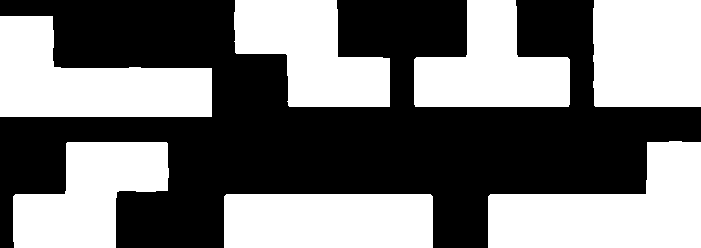

-1

In [35]:
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=5)
cv2_imshow(mask)
cv2.waitKey(0)

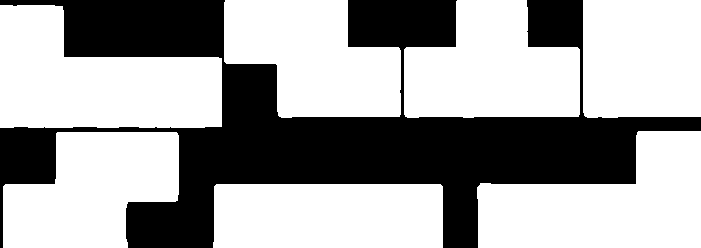

-1

In [36]:
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations=5)
cv2_imshow(mask)
cv2.waitKey(0)

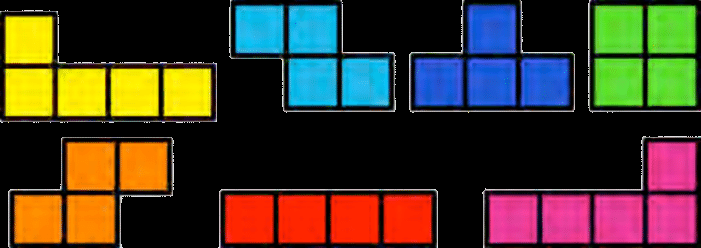

-1

In [37]:
# a typical operation we may want to apply is to take our mask and
# apply a bitwise AND to our input image, keeping only the masked
# regions
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(output)
cv2.waitKey(0)